In [1]:
from dataset import ChestCocoDetection
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
train = ChestCocoDetection(root="D:\\Siim\\siim-covid19-detection", ann_file="D:\\Siim\\siim-covid19-detection\\test.json", training=True)
test = ChestCocoDetection(root="D:\\Siim\\siim-covid19-detection", ann_file="D:\\Siim\\siim-covid19-detection\\test.json", training=False)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


C:\Users\tobia\Anaconda3\envs\aml\lib\site-packages\albumentations\augmentations\transforms.py:688: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


In [46]:
#found = False
#while not found:
idx = np.random.randint(len(train))
train_img = train.__getitem__(idx)
test_img = test.__getitem__(idx)
 #   found = len(train_img[1]['boxes']) > 0

In [47]:
def add_bounding_boxes(target, ax):
    boxes = target['boxes']
    for box in boxes:
        mp_box = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], edgecolor="r", facecolor='none')
        ax.add_patch(mp_box)

def show_samples_for(test, train):
    print(test[1])
    fig, axs = plt.subplots(1, 2, figsize=(10,8))
    #fig.suptitle(f'Study: {samples["id"].iloc[i]}')
    for im_i, (img, data) in enumerate([test, train]):
        ax = axs[im_i] if isinstance(axs, np.ndarray) else axs
        ax.set_title(f'Instance / Image Nr. {im_i + 1} / {2}')
        #dcm = pydicom.dcmread(image_path)
        plt.figure()
        ax.imshow(img.permute(1,2,0), cmap=plt.cm.bone)
        add_bounding_boxes(data, ax)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'image_id': tensor([3438]), 'boxes': tensor([[103.0712, 385.7101, 399.9636, 709.6703]]), 'area': tensor([96181.3516]), 'labels': tensor([1]), 'size': tensor([2846, 2330], dtype=torch.int16)}


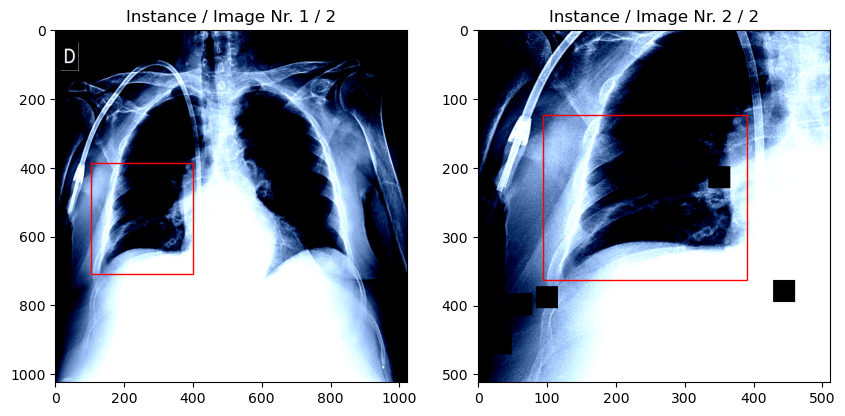

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [48]:
show_samples_for(test_img, train_img)

In [27]:
import torch
from model import ChestRCNN

In [49]:
model = ChestRCNN("../resnet/models/resnext101_32x8d_epoch_35.pt")
model.load_state_dict(torch.load("./models/fasterrcnn_epoch_50.pt"))

<All keys matched successfully>

In [50]:
model.eval()

ChestRCNN(
  (model): FasterRCNN(
    (transform): GeneralizedRCNNTransform(
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        Resize(min_size=(512,), max_size=1333, mode='bilinear')
    )
    (backbone): BackboneWithFPN(
      (body): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (act1): ReLU(inplace=True)
            (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False

In [61]:
test_img[0].shape

torch.Size([3, 1024, 1024])

In [65]:
pred = model([test_img[0]])

In [66]:
pred

[{'boxes': tensor([[132.6987, 482.7520, 313.4893, 687.3378],
          [180.3568, 177.1110, 368.6999, 445.5852],
          [166.0459, 511.7103, 273.1288, 696.2612],
          [158.4299, 536.3876, 325.1497, 654.6052],
          [169.5007, 203.1506, 342.9270, 593.3737],
          [165.8903, 545.7901, 272.5117, 608.5131],
          [742.0365, 431.1566, 835.9601, 659.3006],
          [134.2951, 509.8157, 241.9094, 716.5839],
          [217.3246, 485.8977, 330.6039, 676.2479],
          [174.8989, 533.0928, 211.8198, 671.8635],
          [230.8460, 520.7689, 270.8580, 653.9356],
          [216.9161, 203.1829, 383.1252, 358.0148],
          [201.3712, 532.9660, 279.5290, 622.1373],
          [188.8956, 264.3041, 333.1900, 464.0656],
          [163.1364, 572.8311, 230.2703, 662.6589],
          [123.9900, 169.6294, 295.8732, 650.5748],
          [203.3709, 415.2426, 296.9597, 682.1593],
          [108.7394, 539.5756, 276.1833, 666.1459],
          [218.4998, 530.9431, 258.8182, 670.8013],
   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{'image_id': tensor([3438]), 'boxes': tensor([[103.0712, 385.7101, 399.9636, 709.6703]]), 'area': tensor([96181.3516]), 'labels': tensor([1]), 'size': tensor([2846, 2330], dtype=torch.int16)}


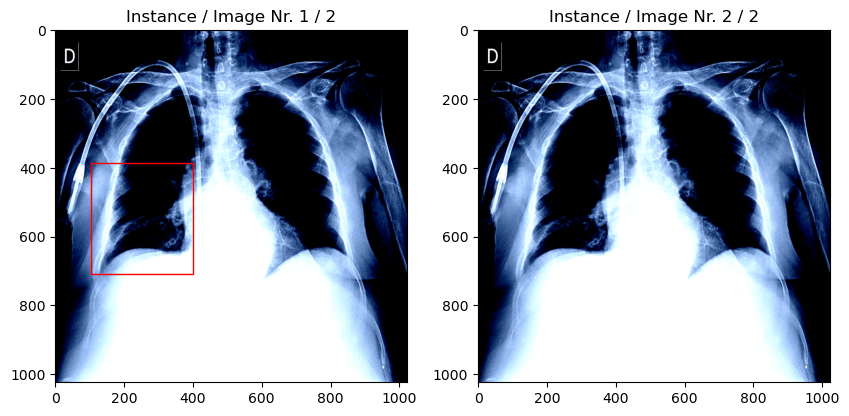

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

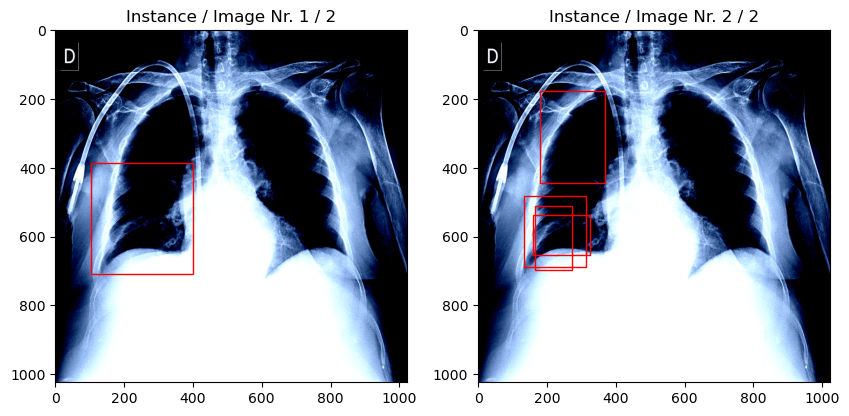

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [67]:
pred[0]['boxes'] = [box for box, score in zip(pred[0]['boxes'].detach().numpy(), pred[0]['scores']) if score > .5]
show_samples_for(test_img, (test_img[0], pred[0]))

In [13]:
import pandas as pd
def make_df(eval_stats):
    return pd.DataFrame(data=eval_stats, columns=["AP50:95", "AP50", "AP75", "AP50:95small", "AP50:95medium", "AP50:95large", "AR50:95", "AR50", "AR75", "AR50:95small", "AR50:95medium", "AR50:95large"])

In [14]:
stats = np.load("losses/fasterrcnn_eval_stats_50.npy")

In [15]:
df = make_df(stats)

In [16]:
df

,AP50:95,AP50,AP75,AP50:95small,AP50:95medium,AP50:95large,AR50:95,AR50,AR75,AR50:95small,AR50:95medium,AR50:95large
0,0.038168,0.168311,0.004055,-1.0,-1.0,0.038168,0.039542,0.169866,0.258042,-1.0,-1.0,0.258042
1,0.078941,0.294308,0.023130,-1.0,-1.0,0.078941,0.072791,0.234711,0.260712,-1.0,-1.0,0.260712
2,0.111939,0.379671,0.030202,-1.0,-1.0,0.111939,0.100064,0.238970,0.257978,-1.0,-1.0,0.257978
3,0.110982,0.384580,0.029720,-1.0,-1.0,0.110982,0.098220,0.251558,0.288175,-1.0,-1.0,0.288175
4,0.125414,0.435254,0.030937,-1.0,-1.0,0.125414,0.105086,0.270820,0.306421,-1.0,-1.0,0.306421
5,0.108153,0.384463,0.026172,-1.0,-1.0,0.108153,0.091481,0.266751,0.306421,-1.0,-1.0,0.306421
6,0.122733,0.413673,0.035811,-1.0,-1.0,0.122733,0.105213,0.288748,0.317228,-1.0,-1.0,0.317228
7,0.120279,0.415251,0.032352,-1.0,-1.0,0.120279,0.105022,0.285188,0.310108,-1.0,-1.0,0.310108
8,0.122255,0.427314,0.030545,-1.0,-1.0,0.122255,0.105149,0.296313,0.320534,-1.0,-1.0,0.320534
9,0.116398,0.402591,0.027387,-1.0,-1.0,0.116398,0.099110,0.288748,0.310807,-1.0,-1.0,0.310807


<Figure size 640x480 with 0 Axes>

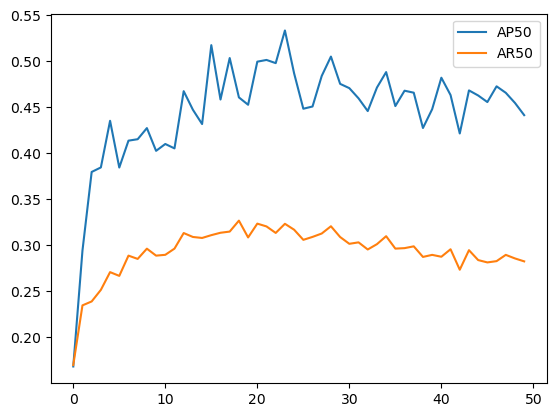

In [21]:
plt.figure()
df.plot(y=["AP50", "AR50"])
plt.show()